# Data Collection - Gathering audio data and features

This notebook focuses on both the collection of audio data and audio features for songs found in the `gather_nonwinning_tabular_data.ipynb` and `gather_winning_tabular_data.ipynb` files. I decided to split the Award Show Winners and the Non-winners, despite sharing similar processes. I feel that adds to the notebook's readability, organization, and it preserves the order in which I obtained the data (*Non-winners was obtained at a later date*).

In [140]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs

# Award Show Winners

In [141]:
import pandas as pd

df = pd.read_csv('data/tables/updated_all_award_show_winners.csv', index_col=0)
df

,Episode,Date,Artist,Song,Points,Award Show,Search Query
0,"1,121","January 9, 2022",Ive,Eleven,8533,Inkigayo,track:Eleven artist:Ive year:2000-2022
1,"1,122","January 16, 2022",Ive,Eleven,6583,Inkigayo,track:Eleven artist:Ive year:2000-2022
2,"1,123","January 23, 2022",Ive,Eleven,5927,Inkigayo,track:Eleven artist:Ive year:2000-2022
3,"1,124","January 30, 2022",Got the Beat,Step Back,5612,Inkigayo,track:Step Back artist:Got the Beat year:2000-...
4,"1,125","February 20, 2022",Got the Beat,Step Back,7224,Inkigayo,track:Step Back artist:Got the Beat year:2000-...
...,...,...,...,...,...,...,...
806,371,"March 11, 2025",Hearts2Hearts,The Chase,8500,The Show,track:The Chase artist:Hearts2Hearts year:2000...
807,372,"March 25, 2025",STAYC,Bebe,7421,The Show,track:Bebe artist:STAYC year:2000-2025
808,373,"April 1, 2025",Ten,Stunner,8600,The Show,track:Stunner artist:Ten year:2000-2025
809,374,"April 8, 2025",Close Your Eyes,All My Poetry,8605,The Show,track:All My Poetry artist:Close Your Eyes yea...


In [142]:
## Preprocessing that went unnoticed
df.loc[df.Song == 'Future Perfect', "Song"] = 'Future Perfect (Pass the MIC)'

df['Song_Artist'] = df.Song + " " + df.Artist
df['Artist_Song'] = df.Artist + " " + df.Song

unique_queries = df['Artist_Song'].unique().tolist()
unique_queries.sort()
unique_queries

['(G)I-dle Fate',
 '(G)I-dle Klaxon',
 '(G)I-dle Nxde',
 '(G)I-dle Queencard',
 '(G)I-dle Super Lady',
 '(G)I-dle Tomboy',
 'AB6IX Loser',
 'AKMU Love Lee',
 'Aespa Armageddon',
 'Aespa Drama',
 'Aespa Girls',
 'Aespa Spicy',
 'Aespa Supernova',
 'Aespa Up',
 'Aespa Whiplash',
 'Apink Dilemma',
 'Astro Candy Sugar Pop',
 'Ateez Bouncy (K-Hot Chilli Peppers)',
 'Ateez Crazy Form',
 'Ateez Guerrilla',
 'Ateez Halazia',
 'Ateez Ice on My Teeth',
 'Ateez Work',
 'BSS CBZ (Prime Time)',
 'BSS Fighting',
 'BTS Take Two',
 'BTS Yet to Come',
 'BabyMonster Sheesh',
 'Baekhyun Pineapple Slice',
 'Bibi Bam Yang Gang',
 'Big Bang Still Life',
 'Billlie Eunoia',
 'Blackpink Pink Venom',
 'Blackpink Shut Down',
 'BoyNextDoor But Sometimes',
 'BoyNextDoor Earth, Wind & Fire',
 'BoyNextDoor If I Say, I Love You',
 'BoyNextDoor Nice Guy',
 'BtoB The Song',
 'CSR ♡Ticon',
 'Chungha Sparkling',
 'Close Your Eyes All My Poetry',
 'Cravity Groovy',
 'Cravity Love or Die',
 'Cravity Party Rock',
 'DKZ Uh-H

In [143]:
queries_links = dict()

from download_audio import process_songs_dataframe

linked_df = process_songs_dataframe(df)
linked_df

File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Skipping download.
File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Skipping download.
File already exists for Tomboy by (G)I-dle. Skipping download.
File already exists for Tomboy by (G)I-dle. Skipping download.
File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Fate by (G)I-dle. Skipping download.
File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Nxde by (G)I-dle. Skipping download.
File already exists for Super Lady by (G)I-dle. Skipping download.
File already exists for Queencard by (G)I-dle. Ski

,Episode,Date,Artist,Song,Points,Award Show,Search Query,Song_Artist,Artist_Song,file_path
185,776,"October 27, 2022",(G)I-dle,Nxde,0,M Countdown,track:Nxde artist:(G)I-dle year:2000-2022,Nxde (G)I-dle,(G)I-dle Nxde,data/audio/nxde_(g)i-dle.flac
644,812,"June 10, 2023",(G)I-dle,Queencard,6460,Show! Music Core,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac
643,811,"June 3, 2023",(G)I-dle,Queencard,8133,Show! Music Core,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac
64,"1,185","June 4, 2023",(G)I-dle,Queencard,9423,Inkigayo,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac
496,456,"November 9, 2022",(G)I-dle,Nxde,5435,Show Champion,track:Nxde artist:(G)I-dle year:2000-2022,Nxde (G)I-dle,(G)I-dle Nxde,data/audio/nxde_(g)i-dle.flac
...,...,...,...,...,...,...,...,...,...,...
265,857,"September 5, 2024",Zerobaseone,Good So Bad,8790,M Countdown,track:Good So Bad artist:Zerobaseone year:2000...,Good So Bad Zerobaseone,Zerobaseone Good So Bad,data/audio/good_so_bad_zerobaseone.flac
791,354,"May 28, 2024",Zerobaseone,Feel the Pop,7430,The Show,track:Feel the Pop artist:Zerobaseone year:200...,Feel the Pop Zerobaseone,Zerobaseone Feel the Pop,data/audio/feel_the_pop_zerobaseone.flac
580,545,"March 5, 2025",Zerobaseone,Blue,6917,Show Champion,track:Blue artist:Zerobaseone year:2000-2025,Blue Zerobaseone,Zerobaseone Blue,data/audio/blue_zerobaseone.flac
107,"1,228","May 19, 2024",Zico,Spot!,7968,Inkigayo,track:Spot! artist:Zico year:2000-2024,Spot! Zico,Zico Spot!,data/audio/spot!_zico.flac


In [144]:
len(unique_queries), len(linked_df.file_path.unique())

(277, 277)

## Applying the Models onto downloaded songs

In [145]:
from essentia_models import EssentiaPredictor

predictor = EssentiaPredictor()  

INFO:essentia_models:Initializing models in batches...
INFO:essentia_models:Initializing model 1: vggish_embedding_model...
INFO:essentia_models:Model 1 (vggish_embedding_model) initialized in 1.14 seconds.
INFO:essentia_models:Initializing model 2: effnet_embedding_model...
INFO:essentia_models:Model 2 (effnet_embedding_model) initialized in 0.23 seconds.
INFO:essentia_models:Initializing model 3: vggish_dance_model...
INFO:essentia_models:Model 3 (vggish_dance_model) initialized in 0.09 seconds.
INFO:essentia_models:Initializing model 4: vggish_party_model...
INFO:essentia_models:Model 4 (vggish_party_model) initialized in 0.09 seconds.
INFO:essentia_models:Initializing model 5: vggish_happy_model...
INFO:essentia_models:Model 5 (vggish_happy_model) initialized in 0.10 seconds.
INFO:essentia_models:Initializing model 6: vggish_sad_model...
INFO:essentia_models:Model 6 (vggish_sad_model) initialized in 0.08 seconds.
INFO:essentia_models:Initializing model 7: effnet_party_model...
INFO

In [146]:
import json
winning_feature_filepath = 'data/tables/award_winning_features.json'

if os.path.exists(winning_feature_filepath):
    with open(winning_feature_filepath, 'r') as f:
        link_to_features = json.load(f)
else:
    link_to_features = dict()    


In [147]:
unique_file_paths = linked_df.file_path.unique().tolist()

for query in unique_file_paths:
    if query not in link_to_features:
        link_to_features[query] = predictor.predict_all(query)  
    print(f"Processed {query} with features: {link_to_features[query]}")

Processed data/audio/nxde_(g)i-dle.flac with features: {'vggish_dance': 91.35226607322693, 'vggish_party': 20.125487446784973, 'vggish_happy': 73.87317419052124, 'vggish_sad': 82.41556286811829, 'effnet_party': 9.883992373943329, 'effnet_happy': 65.4112160205841, 'effnet_sad': 90.90889096260071, 'effnet_approachability': 73.7064003944397, 'effnet_engagement': 94.5786714553833, 'effnet_timbre_bright': 50.409603118896484, 'tempo': 136.0}
Processed data/audio/queencard_(g)i-dle.flac with features: {'vggish_dance': 92.97465682029724, 'vggish_party': 14.019252359867096, 'vggish_happy': 81.47186040878296, 'vggish_sad': 88.08814883232117, 'effnet_party': 1.0551187209784985, 'effnet_happy': 87.54758834838867, 'effnet_sad': 94.290292263031, 'effnet_approachability': 80.3571343421936, 'effnet_engagement': 98.42969179153442, 'effnet_timbre_bright': 48.34543168544769, 'tempo': 130.0}
Processed data/audio/tomboy_(g)i-dle.flac with features: {'vggish_dance': 93.24236512184143, 'vggish_party': 15.567

In [148]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features(features, title):
    plt.figure(figsize=(10, 6))
    plt.hist(features, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

def plot_features_subplots(features_dict):
    num_features = len(features_dict)
    fig, axs = plt.subplots(num_features, 1, figsize=(10, 6 * num_features))
    fig.tight_layout(pad=5.0)

    for i, (title, features) in enumerate(features_dict.items()):
        axs[i].hist(features, color='blue', alpha=0.7)
        axs[i].set_title(title)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(axis='y', alpha=0.75)

    plt.show()

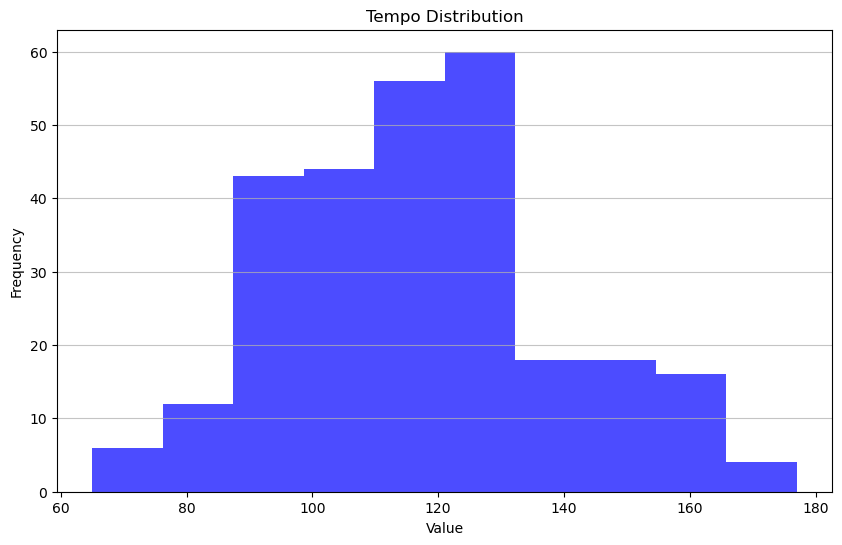

In [149]:
tempo_values = [x['tempo'] for x in link_to_features.values()]
plot_features(tempo_values, "Tempo Distribution")

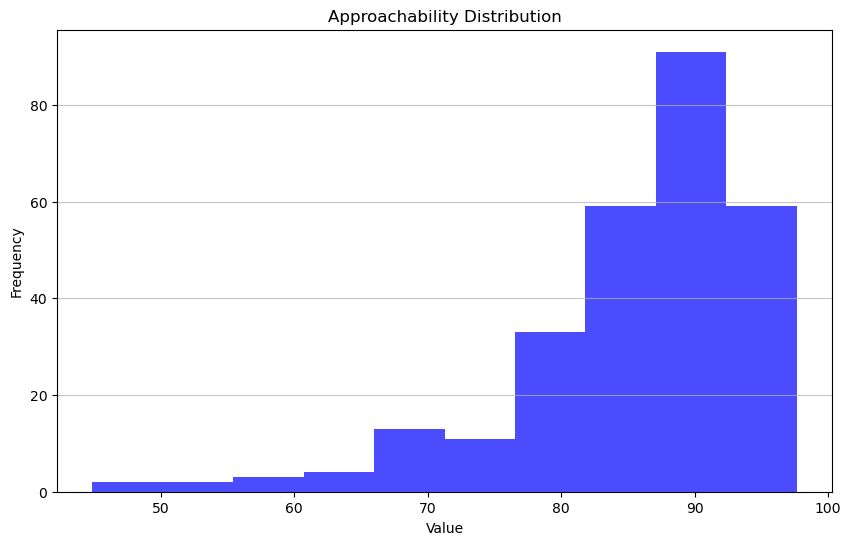

In [150]:
appr_values = [x['effnet_approachability'] for x in link_to_features.values()]
plot_features(appr_values, "Approachability Distribution")

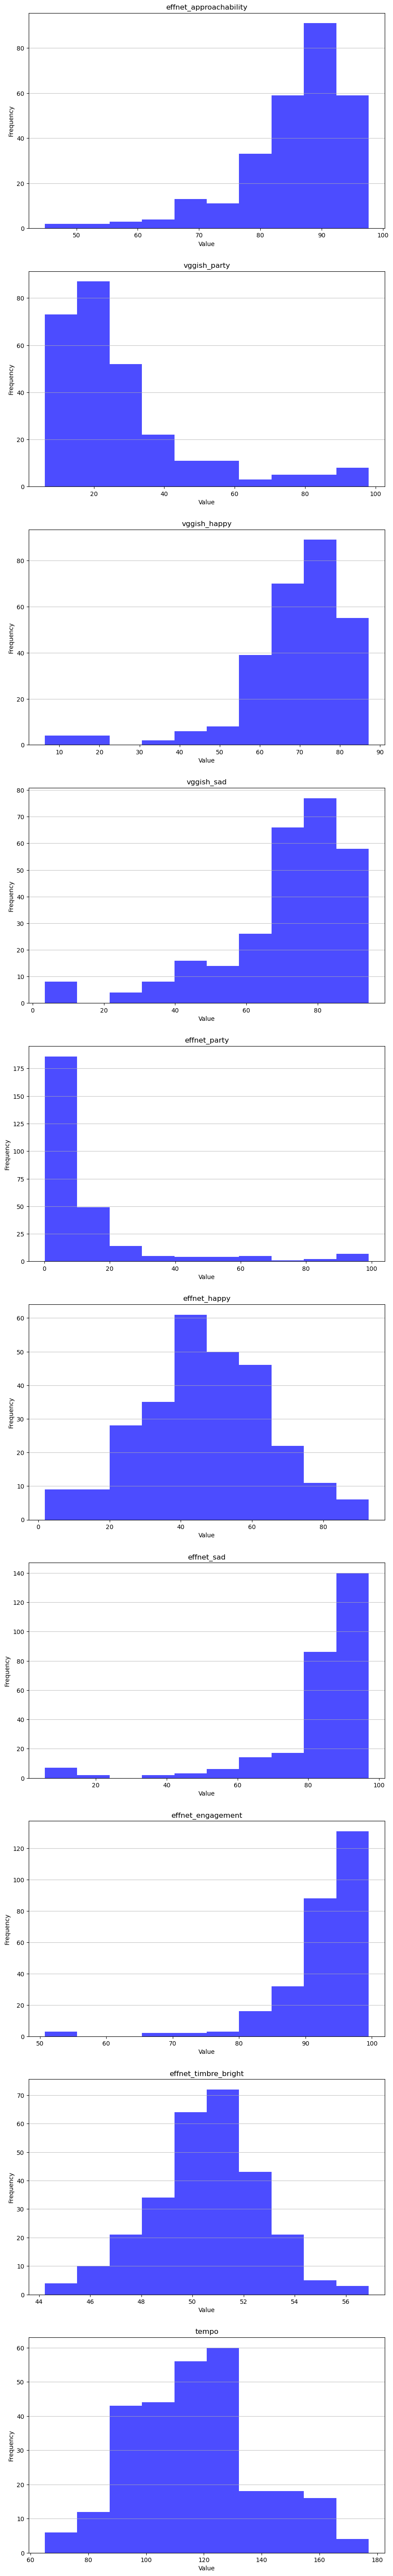

In [151]:
feature_list = ['effnet_approachability', 'vggish_party', 'vggish_happy', 'vggish_sad', 'effnet_party', 'effnet_happy', 'effnet_sad', 'effnet_approachability', 'effnet_engagement', 'effnet_timbre_bright', 'tempo']
plot_features_subplots({feature: [x[feature] for x in link_to_features.values()] for feature in feature_list})


As seen in the histograms above, some of the model distributions appear to be either right or left skewed. Therefore, we will need to normalize the values once we have both datasets, award-winning and non-award-winning, before normalizing the values.

In [152]:
import json
with open('data/tables/award_winning_features.json', 'w') as f:
    json.dump(link_to_features, f, indent=4)

# Award Show Non-winners

In [153]:
nonwinning_df = pd.read_csv('data/tables/all_award_show_non_winners.csv', keep_default_na=False, na_values=[''])
nonwinning_df['Artist_Song'] = nonwinning_df.Artist + " " + nonwinning_df.Song
nonwinning_unique_queries = nonwinning_df['Artist_Song'].unique().tolist()
nonwinning_unique_queries.sort()
nonwinning_unique_queries

['(G)I-DLE Wife',
 '82MAJOR Choke',
 '8TURN EXCEL',
 '8TURN LEGGO',
 'A.C.E My Girl',
 'AB6IX NVKED',
 "AKMU Fry's Dream",
 'ALL(H)OURS GIMME GIMME',
 'ARrC nu kidz',
 'ATBO Next To Me',
 'BABYMONSTER DRIP',
 'BABYMONSTER FOREVER',
 'BBGIRLS ONE MORE TIME',
 'BIGNaughty Vancouver 2',
 'BOL4 Someday (ft HaHyunSang)',
 'BTS Dynamite',
 'BamBam LAST PARADE',
 'Billlie remembrance candy',
 'CHUU Strawberry Rush',
 'CIX Lovers Or Enemies',
 'CIX Save me, Kill me',
 'CIX THUNDER',
 'Cravity Now or Never',
 'Cravity Ready Or Not',
 'D.O Somebody',
 "DAVICHI I'll be by your side",
 'DAY6 Time of Our Life',
 'DAY6 Welcome to the Show',
 'DKZ Cupid',
 'DRIPPIN Weekend',
 'DXMON Girls, Love boys, Love girls',
 'Dreamcatcher JUSTICE',
 'Dreamcatcher OOTD',
 'ENHYPEN Brought The Heat Back',
 'ENHYPEN No Doubt',
 'EPEX Anthem of Teen Spirit',
 'EPEX FULL METAL JACKET',
 'EPEX UNIVERSE',
 'EPEX Youth2Youth',
 'EVERGLOW ZOMBIE',
 'EVNNE Badder Love',
 'EVNNE TROUBLE',
 'EXO ?',
 'FANTASY BOYS Pitter-P

In [154]:
nonwinning_queries_links = dict()
nonwinning_linked_df = process_songs_dataframe(nonwinning_df)
nonwinning_linked_df

File already exists for Wife by (G)I-DLE. Skipping download.
File already exists for Wife by (G)I-DLE. Skipping download.
File already exists for Choke by 82MAJOR. Skipping download.
File already exists for EXCEL by 8TURN. Skipping download.
File already exists for LEGGO by 8TURN. Skipping download.
File already exists for My Girl by A.C.E. Skipping download.
File already exists for NVKED by AB6IX. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for Fry's Dream by AKMU. Skipping download.
File already exists for GIMME GIMME by ALL(H)OURS. Skipping download.
File already exists for nu kidz by ARrC. Skipping download.
File already exists for Next To Me by ATBO. Skipping download.
Fi

,Show,Date,Placement,Artist,Song,Total,Artist_Song,file_path
24,Inkigayo,2024-02-18,3,(G)I-DLE,Wife,6269,(G)I-DLE Wife,data/audio/wife_(g)i-dle.flac
88,M Countdown,2024-02-01,2,(G)I-DLE,Wife,6305,(G)I-DLE Wife,data/audio/wife_(g)i-dle.flac
296,The Show,2024-05-07,3,82MAJOR,Choke,2950,82MAJOR Choke,data/audio/choke_82major.flac
265,The Show,2023-07-04,3,8TURN,EXCEL,2949,8TURN EXCEL,data/audio/excel_8turn.flac
216,Show Champion,2025-03-12,4,8TURN,LEGGO,2185,8TURN LEGGO,data/audio/leggo_8turn.flac
...,...,...,...,...,...,...,...,...
287,The Show,2024-03-19,3,xikers,We Don't Stop,2507,xikers We Don't Stop,data/audio/we_don't_stop_xikers.flac
276,The Show,2023-08-29,3,xikers,HOMEBOY,2932,xikers HOMEBOY,data/audio/homeboy_xikers.flac
272,The Show,2023-08-08,2,xikers,DO or DIE,5693,xikers DO or DIE,data/audio/do_or_die_xikers.flac
220,Show Champion,2025-04-09,5,xikers,BREATHE,2803,xikers BREATHE,data/audio/breathe_xikers.flac


In [155]:
non_winning_feature_filepath = 'data/tables/award_non_winning_features.json'

if os.path.exists(non_winning_feature_filepath):
    with open(non_winning_feature_filepath, 'r') as f:
        link_to_non_winning_features = json.load(f)
else:
    link_to_non_winning_features = dict()    

In [156]:
unique_non_winning_file_paths = nonwinning_linked_df.file_path.unique().tolist()
for query in unique_non_winning_file_paths:
    if query not in link_to_non_winning_features:
        link_to_non_winning_features[query] = predictor.predict_all(query)  
    print(f"Processed {query} with features: {link_to_non_winning_features[query]}")

Processed data/audio/wife_(g)i-dle.flac with features: {'vggish_dance': 96.56345844268799, 'vggish_party': 8.666031807661057, 'vggish_happy': 76.26199126243591, 'vggish_sad': 91.65633916854858, 'effnet_party': 1.6236817464232445, 'effnet_happy': 72.60838747024536, 'effnet_sad': 95.34928798675537, 'effnet_approachability': 66.24716520309448, 'effnet_engagement': 98.27237725257874, 'effnet_timbre_bright': 48.90199601650238, 'tempo': 124.0}
Processed data/audio/choke_82major.flac with features: {'vggish_dance': 92.53913760185242, 'vggish_party': 20.446108281612396, 'vggish_happy': 65.67244529724121, 'vggish_sad': 74.81195330619812, 'effnet_party': 8.194534480571747, 'effnet_happy': 33.80016386508942, 'effnet_sad': 87.73249983787537, 'effnet_approachability': 76.47510170936584, 'effnet_engagement': 95.43291330337524, 'effnet_timbre_bright': 49.573370814323425, 'tempo': 106.0}
Processed data/audio/excel_8turn.flac with features: {'vggish_dance': 93.82556080818176, 'vggish_party': 14.5058706

In [157]:
import json
with open('data/tables/award_non_winning_features.json', 'w') as f:
    json.dump(link_to_non_winning_features, f, indent=4)

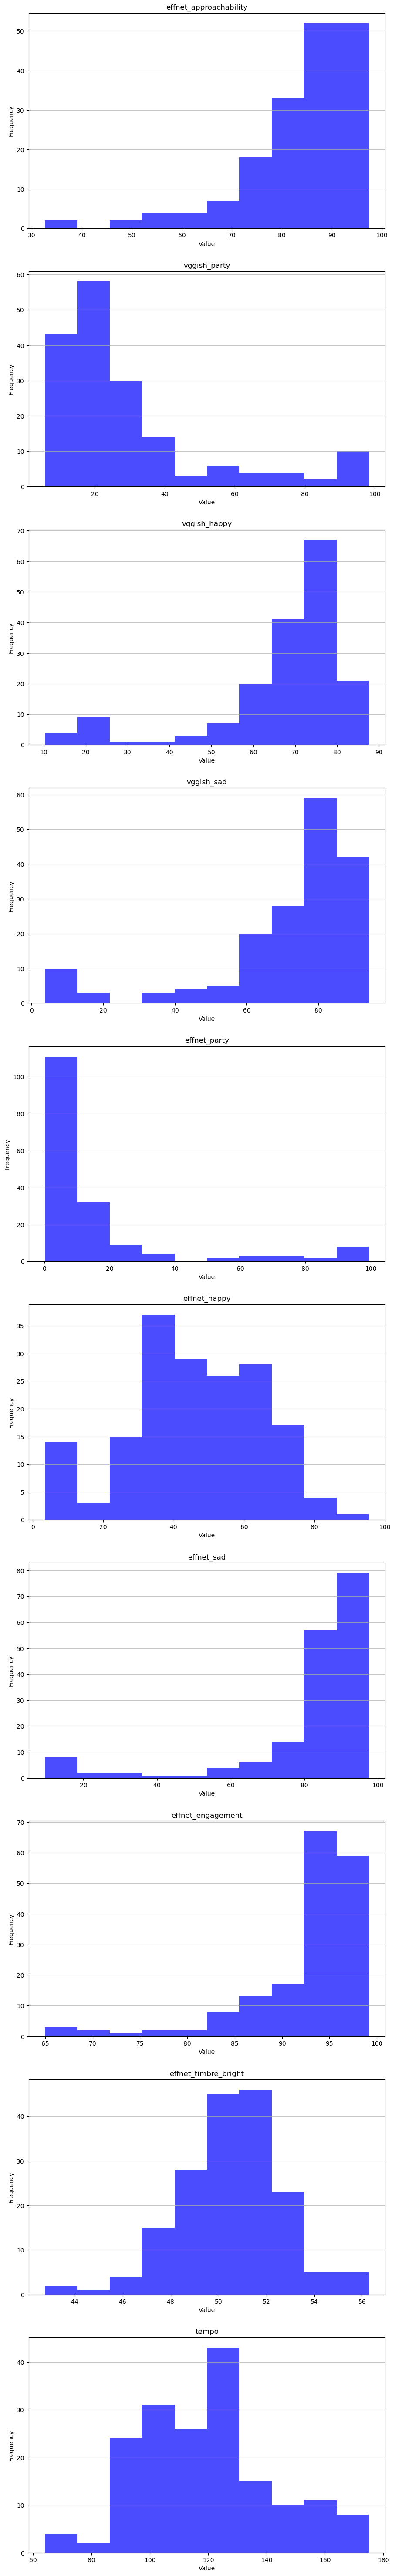

In [158]:
feature_list = ['effnet_approachability', 'vggish_party', 'vggish_happy', 'vggish_sad', 'effnet_party', 'effnet_happy', 'effnet_sad', 'effnet_approachability', 'effnet_engagement', 'effnet_timbre_bright', 'tempo']
plot_features_subplots({feature: [x[feature] for x in link_to_non_winning_features.values()] for feature in feature_list})

# Merging Dataframes

In [159]:
win_feature_df = pd.DataFrame.from_dict(link_to_features, orient='index')
linked_df = linked_df.join(win_feature_df, on='file_path')

In [160]:
linked_df['Winner'] = 1
linked_df = linked_df.reset_index(drop=True)
linked_df.head()

,Episode,Date,Artist,Song,Points,Award Show,Search Query,Song_Artist,Artist_Song,file_path,...,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo,Winner
0,776,"October 27, 2022",(G)I-dle,Nxde,0,M Countdown,track:Nxde artist:(G)I-dle year:2000-2022,Nxde (G)I-dle,(G)I-dle Nxde,data/audio/nxde_(g)i-dle.flac,...,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0,1
1,812,"June 10, 2023",(G)I-dle,Queencard,6460,Show! Music Core,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac,...,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0,1
2,811,"June 3, 2023",(G)I-dle,Queencard,8133,Show! Music Core,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac,...,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0,1
3,"1,185","June 4, 2023",(G)I-dle,Queencard,9423,Inkigayo,track:Queencard artist:(G)I-dle year:2000-2023,Queencard (G)I-dle,(G)I-dle Queencard,data/audio/queencard_(g)i-dle.flac,...,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0,1
4,456,"November 9, 2022",(G)I-dle,Nxde,5435,Show Champion,track:Nxde artist:(G)I-dle year:2000-2022,Nxde (G)I-dle,(G)I-dle Nxde,data/audio/nxde_(g)i-dle.flac,...,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0,1


In [161]:
# Drop unnecessary columns and rename for clarity and compatibility with non-winning data
all_linked_df = linked_df.copy().drop(columns=['Episode', 'Search Query', 'Song_Artist', 'Artist_Song'])
all_linked_df.rename(columns={"Points": "Total", "Award Show": "Show"}, inplace=True)

# Reorder columns to match the non-winning data
columns_reorder = ["Show", "Date", "Artist", "Song", "Total", "Winner"]
all_linked_df = pd.concat([all_linked_df[columns_reorder], all_linked_df.drop(columns=columns_reorder)], axis=1)
all_linked_df

,Show,Date,Artist,Song,Total,Winner,file_path,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo
0,M Countdown,"October 27, 2022",(G)I-dle,Nxde,0,1,data/audio/nxde_(g)i-dle.flac,91.352266,20.125487,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0
1,Show! Music Core,"June 10, 2023",(G)I-dle,Queencard,6460,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
2,Show! Music Core,"June 3, 2023",(G)I-dle,Queencard,8133,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
3,Inkigayo,"June 4, 2023",(G)I-dle,Queencard,9423,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
4,Show Champion,"November 9, 2022",(G)I-dle,Nxde,5435,1,data/audio/nxde_(g)i-dle.flac,91.352266,20.125487,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,M Countdown,"September 5, 2024",Zerobaseone,Good So Bad,8790,1,data/audio/good_so_bad_zerobaseone.flac,93.702263,16.565727,73.101836,81.184137,6.841905,45.554000,89.486134,86.659151,95.681417,48.281586,110.0
807,The Show,"May 28, 2024",Zerobaseone,Feel the Pop,7430,1,data/audio/feel_the_pop_zerobaseone.flac,91.431856,27.618122,70.766145,66.936976,8.622418,66.784495,86.133045,77.707762,96.404940,47.780374,149.0
808,Show Champion,"March 5, 2025",Zerobaseone,Blue,6917,1,data/audio/blue_zerobaseone.flac,84.842449,28.527823,70.113111,66.945744,16.579294,45.630783,80.259615,85.578495,90.673542,49.779278,124.0
809,Inkigayo,"May 19, 2024",Zico,Spot!,7968,1,data/audio/spot!_zico.flac,94.729561,13.762869,77.733326,84.049684,2.071706,58.257109,90.045017,83.438623,97.105968,51.325864,108.0


In [162]:
all_linked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Show                    811 non-null    object 
 1   Date                    811 non-null    object 
 2   Artist                  811 non-null    object 
 3   Song                    811 non-null    object 
 4   Total                   811 non-null    int64  
 5   Winner                  811 non-null    int64  
 6   file_path               811 non-null    object 
 7   vggish_dance            811 non-null    float64
 8   vggish_party            811 non-null    float64
 9   vggish_happy            811 non-null    float64
 10  vggish_sad              811 non-null    float64
 11  effnet_party            811 non-null    float64
 12  effnet_happy            811 non-null    float64
 13  effnet_sad              811 non-null    float64
 14  effnet_approachability  811 non-null    fl

In [163]:
lose_feature_df = pd.DataFrame.from_dict(link_to_non_winning_features, orient='index')
# lose_feature_df
nonwinning_linked_df = nonwinning_linked_df.join(lose_feature_df, on='file_path')

In [164]:
nonwinning_to_merge_df = nonwinning_linked_df.copy().drop(['Artist_Song', 'Placement'], axis=1).reset_index(drop=True)
nonwinning_to_merge_df['Winner'] = 0
nonwinning_to_merge_df = pd.concat([nonwinning_to_merge_df[columns_reorder], nonwinning_to_merge_df.drop(columns=columns_reorder)], axis=1)
nonwinning_to_merge_df

,Show,Date,Artist,Song,Total,Winner,file_path,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo
0,Inkigayo,2024-02-18,(G)I-DLE,Wife,6269,0,data/audio/wife_(g)i-dle.flac,96.563458,8.666032,76.261991,91.656339,1.623682,72.608387,95.349288,66.247165,98.272377,48.901996,124.0
1,M Countdown,2024-02-01,(G)I-DLE,Wife,6305,0,data/audio/wife_(g)i-dle.flac,96.563458,8.666032,76.261991,91.656339,1.623682,72.608387,95.349288,66.247165,98.272377,48.901996,124.0
2,The Show,2024-05-07,82MAJOR,Choke,2950,0,data/audio/choke_82major.flac,92.539138,20.446108,65.672445,74.811953,8.194534,33.800164,87.732500,76.475102,95.432913,49.573371,106.0
3,The Show,2023-07-04,8TURN,EXCEL,2949,0,data/audio/excel_8turn.flac,93.825561,14.505871,70.746601,87.436521,5.442486,48.122197,91.933846,83.860648,93.349755,50.122052,118.0
4,Show Champion,2025-03-12,8TURN,LEGGO,2185,0,data/audio/leggo_8turn.flac,92.227066,17.460561,73.481637,85.176212,5.382357,64.587736,88.510275,87.811875,96.950865,47.342104,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,The Show,2024-03-19,xikers,We Don't Stop,2507,0,data/audio/we_don't_stop_xikers.flac,91.866928,14.823136,62.313324,88.575870,4.802846,50.686002,94.867623,72.911227,97.337955,46.941653,104.0
327,The Show,2023-08-29,xikers,HOMEBOY,2932,0,data/audio/homeboy_xikers.flac,93.750942,16.895656,68.301415,71.766502,6.488638,59.391260,89.845961,80.581129,95.526505,50.632000,138.0
328,The Show,2023-08-08,xikers,DO or DIE,5693,0,data/audio/do_or_die_xikers.flac,76.148283,23.598190,62.018633,93.452352,5.584002,80.498070,96.787137,75.473613,99.064237,46.210933,169.0
329,Show Champion,2025-04-09,xikers,BREATHE,2803,0,data/audio/breathe_xikers.flac,85.196966,29.395086,51.734620,77.542847,20.699333,46.466920,89.911395,57.283974,93.417108,48.471853,155.0


In [165]:
from datetime import datetime 
def parse_date(date_str):
    for fmt in ('%B %d, %Y', '%Y-%m-%d'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if parsing fails

In [166]:
merged_df = pd.concat([all_linked_df, nonwinning_to_merge_df], ignore_index=True)
merged_df = merged_df.reset_index(drop=True)
merged_df["Date"] = merged_df["Date"].apply(parse_date)
merged_df

,Show,Date,Artist,Song,Total,Winner,file_path,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo
0,M Countdown,2022-10-27,(G)I-dle,Nxde,0,1,data/audio/nxde_(g)i-dle.flac,91.352266,20.125487,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0
1,Show! Music Core,2023-06-10,(G)I-dle,Queencard,6460,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
2,Show! Music Core,2023-06-03,(G)I-dle,Queencard,8133,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
3,Inkigayo,2023-06-04,(G)I-dle,Queencard,9423,1,data/audio/queencard_(g)i-dle.flac,92.974657,14.019252,81.471860,88.088149,1.055119,87.547588,94.290292,80.357134,98.429692,48.345432,130.0
4,Show Champion,2022-11-09,(G)I-dle,Nxde,5435,1,data/audio/nxde_(g)i-dle.flac,91.352266,20.125487,73.873174,82.415563,9.883992,65.411216,90.908891,73.706400,94.578671,50.409603,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,The Show,2024-03-19,xikers,We Don't Stop,2507,0,data/audio/we_don't_stop_xikers.flac,91.866928,14.823136,62.313324,88.575870,4.802846,50.686002,94.867623,72.911227,97.337955,46.941653,104.0
1138,The Show,2023-08-29,xikers,HOMEBOY,2932,0,data/audio/homeboy_xikers.flac,93.750942,16.895656,68.301415,71.766502,6.488638,59.391260,89.845961,80.581129,95.526505,50.632000,138.0
1139,The Show,2023-08-08,xikers,DO or DIE,5693,0,data/audio/do_or_die_xikers.flac,76.148283,23.598190,62.018633,93.452352,5.584002,80.498070,96.787137,75.473613,99.064237,46.210933,169.0
1140,Show Champion,2025-04-09,xikers,BREATHE,2803,0,data/audio/breathe_xikers.flac,85.196966,29.395086,51.734620,77.542847,20.699333,46.466920,89.911395,57.283974,93.417108,48.471853,155.0


In [167]:
merged_df.to_csv('data/tables/merged_award_show_winners.csv', index=False)